In [1]:
import numpy as np
import matplotlib.pyplot as plt

VERBOSE = True

## L1. Biased Coin Example

First "primitive" model: prob of heads is eaither 0.7 or 0.3 with a prob of 0.5

In [2]:
data = ['H', 'T', 'T', 'H', 'T', 'T', 'T']
data = np.array(data)



def primitive_model(N, r):
    # prob of observing a seq of r heads in N throws
    return 0.5 * 0.7**r * (1-0.7)**(N-r) + 0.5 * 0.3**r * (1-0.3)**(N-r)

print('Y_data:', data )
print('P(Y_data) = %.3f' %primitive_model(len(data), sum(data=='H')))

joint_data = np.append(data, 'H')
print()
print('Lets now make a prediction... Whats the prob that the next throw is H?')
print('Y_joint:', joint_data)
print('P(Y_pred = H | Y_data) = P(Y_data, Y_pred = H) / P(Y_data) = %.3f'%(  primitive_model(len(joint_data), sum(joint_data=='H'))/primitive_model(len(data), sum(data=='H')) ))




Y_data: ['H' 'T' 'T' 'H' 'T' 'T' 'T']
P(Y_data) = 0.008

Lets now make a prediction... Whats the prob that the next throw is H?
Y_joint: ['H' 'T' 'T' 'H' 'T' 'T' 'T' 'H']
P(Y_pred = H | Y_data) = P(Y_data, Y_pred = H) / P(Y_data) = 0.329


In [3]:
def predict_head(data, verbose=VERBOSE):
    joint_data = np.append(data, 'H')
    return primitive_model(len(joint_data), sum(joint_data=='H'))/primitive_model(len(data), sum(data=='H'))

print('test', predict_head(data))

test 0.32918918918918916


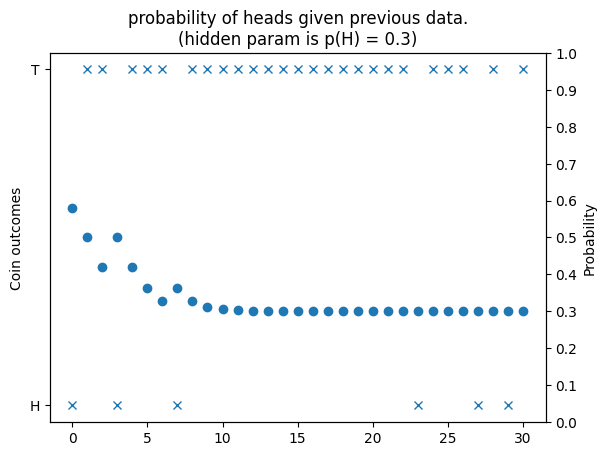

In [4]:
data_biased_coin = joint_data.copy()
for i in range(23):
    data_biased_coin = np.append(data_biased_coin, np.random.choice(['H', 'T'], p = [0.3, 0.7]))

probs = [predict_head(data_biased_coin[0:i]) for i in range(1, len(data_biased_coin)+1)]

x_ls =[i for i in range(len(data_biased_coin))]

fig, ax1 = plt.subplots()

ax1.plot(x_ls, data_biased_coin, 'x')
ax1.set_ylabel('Coin outcomes')
ax1.set_yticks([0, 1])
ax1.set_yticklabels(['H', 'T'])

ax2 = ax1.twinx()
ax2.plot(x_ls, probs, 'o')
ax2.set_ylabel('Probability')
ax2.set_yticks(np.linspace(0,1, 11))

ax1.set_title('probability of heads given previous data.\n(hidden param is p(H) = 0.3)')
print()


# L2
**The bayesian framework**

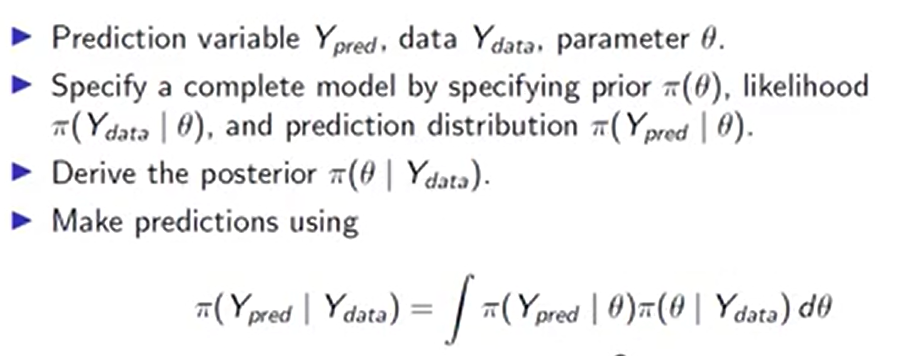

**notation**

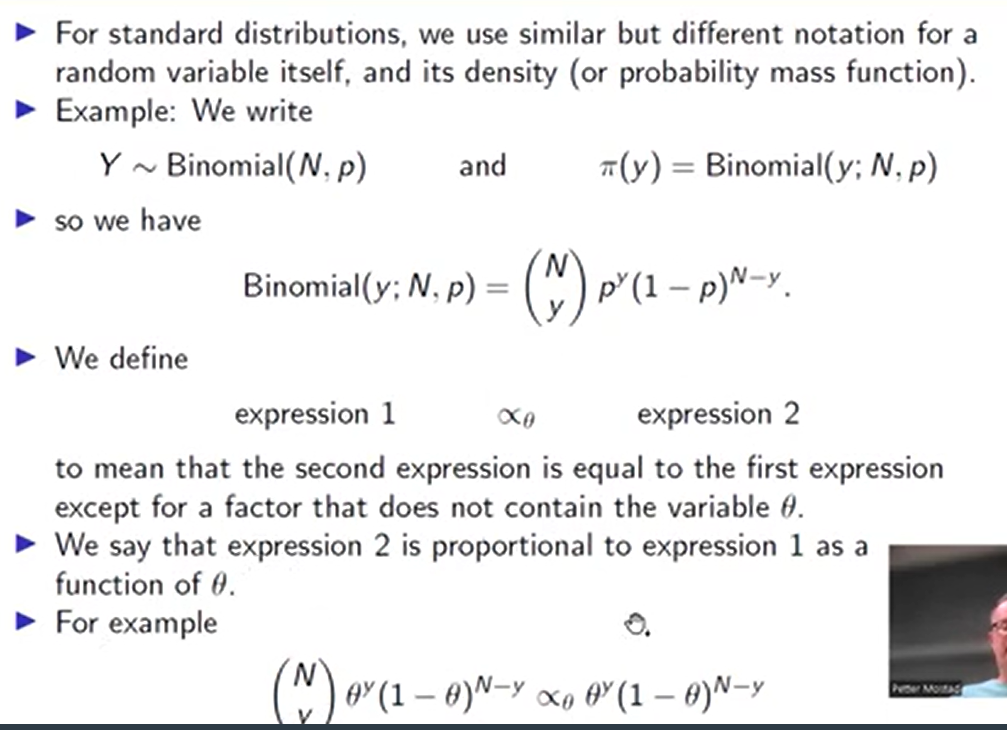

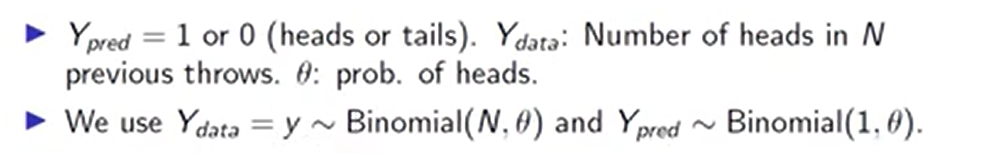

--- 

## Unif Prior:  posterior is a beta distribution if the prior is uniform and the likelihood binomial.


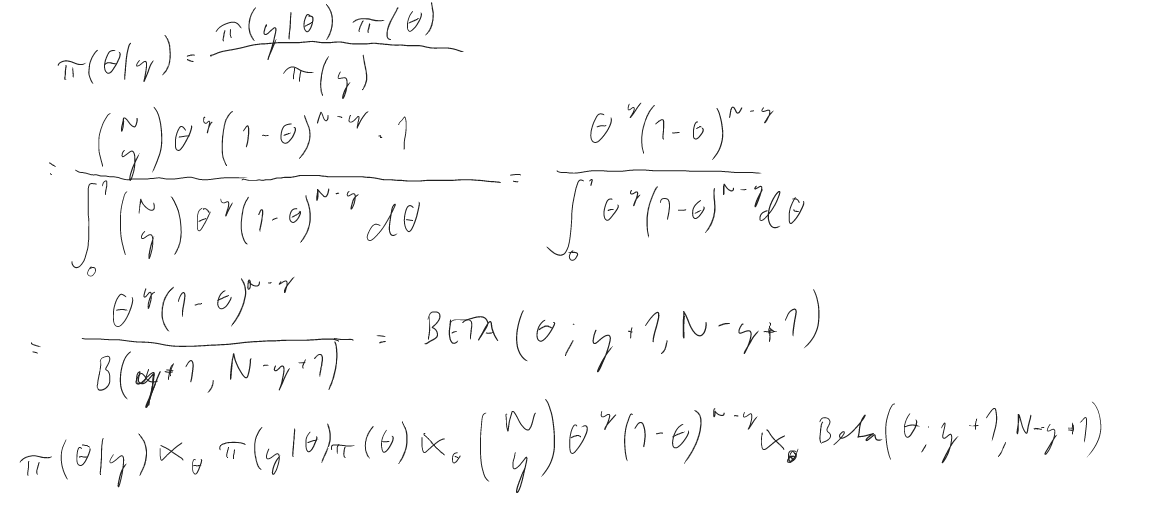

easier to however not consider all the distributions that do not contain theta. (last row)



## Beta Prior: posterior is a beta distribution if the prior is uniform and the likelihood binomial.

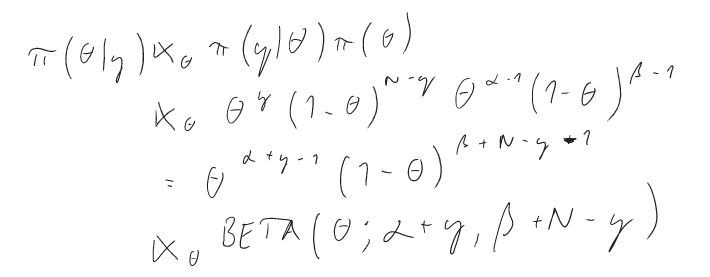

Given a likelihood model π(y | θ). A **conjugate family**
of priors to this likelihood is a parametric family of distributions so
that if the prior for θ is in this family, the posterior θ | y is also in
the family.

Note that Unif(0,1) can viewed as Beta(1,1)

A uniform prior makes little sense. It implies that we think that its equally likely that the tetha is within 0.9-1.0 as 0.45-0.55. The former case is almost impossible even for a biased coin

In this case y represents the number of heads and N the total number of throws

In [31]:
data_long = data_biased_coin.copy()
for i in range(70):
    data_biased_coin = np.append(data_biased_coin, np.random.choice(['H', 'T'], p = [0.3, 0.7]))

In [5]:
import tensorflow_probability as tfp
tfd = tfp.distributions

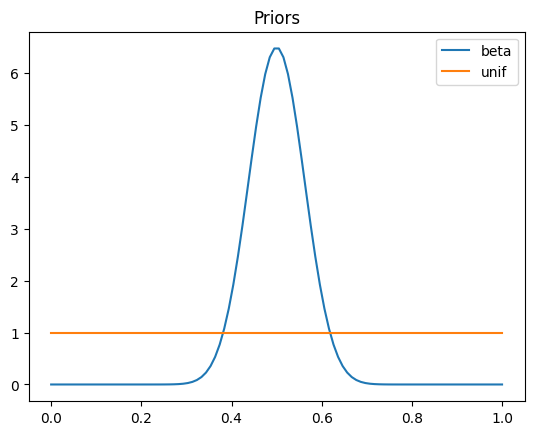

In [20]:
beta_prior = tfd.Beta(33.4, 33.4) #90% of prob in 0.4 , 0.6
unif_prior = tfd.Uniform(0,1)

x = np.linspace(0,1, 100)
plt.plot(x, [beta_prior.prob(i) for i in x], label='beta')
plt.plot(x,  [unif_prior.prob(i) for i in x], label='unif')

plt.title('Priors')
plt.legend()

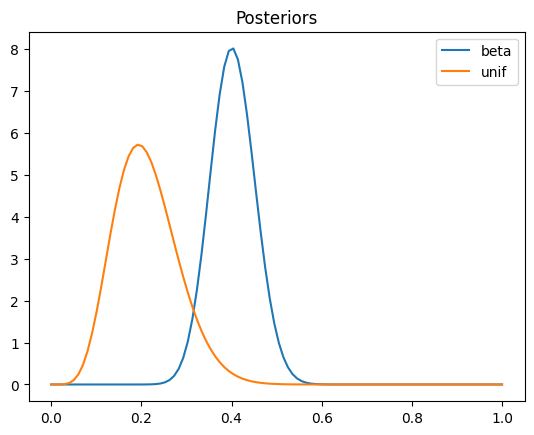

In [30]:
beta_posterior = tfd.Beta(33.4 + np.sum(data_biased_coin=='H'), 33.4 + np.sum(data_biased_coin=='T'))
unif_posterior = tfd.Beta(1. + np.sum(data_biased_coin=='H'), 1. + np.sum(data_biased_coin=='T'))

x = np.linspace(0.0, 1, 100)
plt.plot(x, [beta_posterior.prob(i) for i in x], label='beta')
plt.plot(x,  [unif_posterior.prob(i) for i in x], label='unif')

plt.title('Posteriors')
plt.legend()

In [33]:
def prob_of_heads(posterior, data):
    data_pred = np.append(data, 'H')
    return posterior.prob(data_pred)/posterior.prob(data)

probs = [prob_of_heads(unif_posterior, data_biased_coin[0:i]) for i in range(1, len(data_biased_coin)+1)]

x_ls =[i for i in range(len(data_biased_coin))]

fig, ax1 = plt.subplots()

ax1.plot(x_ls, data_biased_coin, 'x')
ax1.set_ylabel('Coin outcomes')
ax1.set_yticks([0, 1])
ax1.set_yticklabels(['H', 'T'])

ax2 = ax1.twinx()
ax2.plot(x_ls, probs, 'o')
ax2.set_ylabel('Probability')
ax2.set_yticks(np.linspace(0,1, 11))

ax1.set_title('probability of heads given previous data.\n(hidden param is p(H) = 0.3)')
print()




InvalidArgumentError: cannot compute Xlogy as input #1(zero-based) was expected to be a double tensor but is a string tensor [Op:Xlogy]

In [35]:
beta_posterior.mean()

<tf.Tensor: shape=(), dtype=float64, numpy=0.40286298568507156>